<h1 align='center'><b>Введение в нейронные сети<b></h1>

<h2 align='center'>Урок 7. Детектирование объектов</h2>

<h3 align='left'>Практическое задание:</h3>  

Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму для object detection, который не рассматривался на уроке.  
Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур?  
В чем плюсы и минусы данной архитектуры?  
Какие могут возникнуть трудности при применении данной архитектуры на практике?

# Retina Net

## Архитектура нейронной сети RetinaNet

Архитектура свёрточной нейронной сети (СНС) RetinaNet состоит из 4 основных частей, каждая из которых имеет своё назначение:  
a) Backbone – основная (базовая) сеть, служащая для извлечения признаков из поступающего на вход изображения. Данная часть сети является вариативной и в её основу могут входить классификационные нейросети, такие как ResNet, VGG, EfficientNet и другие;<br>
b) Feature Pyramid Net (FPN) – свёрточная нейронная сеть, построенная в виде пирамиды, служащая для объединения достоинств карт признаков нижних и верхних уровней сети, первые имеют высокое разрешение, но низкую семантическую, обобщающую способность; вторые — наоборот; <br> 
c) Classification Subnet – подсеть, извлекающая из FPN информацию о классах объектов, решая задачу классификации;<br>
d) Regression Subnet – подсеть, извлекающая из FPN информацию о координатах объектов на изображении, решая задачу регрессии.<br>


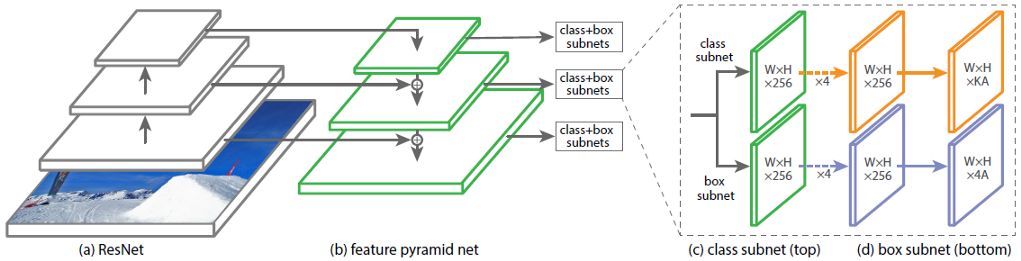